### Importación de Tensorflow

In [1]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

### Importación de datos |

In [3]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


### verificando los datos de prueba

In [4]:
y_train.shape

(60000,)

In [5]:
x_train.shape

(60000, 28, 28)

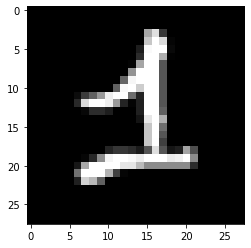

In [6]:
imagendemo=x_train[24]
plt.imshow(imagendemo,cmap='gray')

In [0]:
def image_matrix(img):
    print('\n'.join([''.join(['{:4}'.format(int(round(item*255))) for item in row]) 
      for row in img]))

In [8]:
image_matrix(imagendemo)

   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0423305661014025   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   05023564770555901275   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   073956349564770647702295   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   011475647706477044370 510   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0102041820647706477021675   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   03723064770647706477021675  

Preparando los datos para el entrenamiento
 
La x debe ser convertida a un vector para que pueda ser procesada por la red perceptrón profunda 


In [9]:
x_train=x_train.reshape(-1,28*28).astype('float32')
x_test=x_test.reshape(-1,28*28).astype('float32')
x_train.shape

(60000, 784)

In [10]:
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

Las salidas y deben se codificadas en one hot

In [11]:
# onehot encode
onehot_encoder = OneHotEncoder(sparse=False)
y_train = y_train.reshape(len(y_train), 1)
y_train_onehot = onehot_encoder.fit_transform(y_train)

y_test = y_test.reshape(len(y_test), 1)
y_test_onehot = onehot_encoder.fit_transform(y_test)

y_train_onehot.shape

(60000, 10)

### Declarando la arquitectura

Generando función 

In [0]:
class DNN_model(object):
  def __init__(self,
               n_nodes_hl1=500,
               n_nodes_hl2=500,
               n_nodes_hl3=500,
               n_classes=10):
    self.h1LW = tf.Variable(np.random.rand(784, n_nodes_hl1),name="hl1weigths",dtype="float32")
    self.h1LB = tf.Variable(np.random.rand(n_nodes_hl1),name="hl1bias",dtype="float32")
    self.h2LW = tf.Variable(np.random.rand(n_nodes_hl1, n_nodes_hl2),name="hl2weigths",dtype="float32")
    self.h2LB = tf.Variable(np.random.rand(n_nodes_hl2),name="hl2bias",dtype="float32")
    self.h3LW = tf.Variable(np.random.rand(n_nodes_hl2, n_nodes_hl3),name="hl3weigths",dtype="float32")
    self.h3LB = tf.Variable(np.random.rand(n_nodes_hl3),name="hl3bias",dtype="float32")
    self.outW = tf.Variable(np.random.rand(n_nodes_hl3, n_classes),name="outweigths",dtype="float32")
    self.outB = tf.Variable(np.random.rand(n_classes),name="outbias",dtype="float32")
    self.trainable_variables =[self.h1LW,self.h1LB,self.h2LW,self.h2LB,self.h3LW,self.h3LB,self.outW,self.outB]      
        
  def __call__(self,x): 
      # Declarando la arquitectura
      l1 = tf.add(tf.matmul(x,self.h1LW), self.h1LB)
      l1 = tf.nn.relu(l1)

      l2 = tf.add(tf.matmul(l1,self.h2LW), self.h2LB)
      l2 = tf.nn.relu(l2)

      l3 = tf.add(tf.matmul(l2,self.h3LW), self.h3LB)
      l3 = tf.nn.relu(l3)

      output = tf.matmul(l3,self.outW) + self.outB
      return output

In [13]:
DNN = DNN_model()
DNN(x_train[24:30])

<tf.Tensor: shape=(6, 10), dtype=float32, numpy=
array([[1.80509491e+11, 1.79484557e+11, 1.71919507e+11, 1.66648234e+11,
        1.72191318e+11, 1.72580684e+11, 1.68411152e+11, 1.73025608e+11,
        1.69534816e+11, 1.72239749e+11],
       [3.34879031e+11, 3.32977406e+11, 3.18942708e+11, 3.09164048e+11,
        3.19446712e+11, 3.20169443e+11, 3.12433869e+11, 3.20994869e+11,
        3.14518766e+11, 3.19537283e+11],
       [1.11557698e+11, 1.10924349e+11, 1.06248880e+11, 1.02991413e+11,
        1.06417095e+11, 1.06657718e+11, 1.04080876e+11, 1.06932617e+11,
        1.04775074e+11, 1.06446914e+11],
       [3.79187331e+11, 3.77034146e+11, 3.61142419e+11, 3.50069981e+11,
        3.61713205e+11, 3.62531783e+11, 3.53772831e+11, 3.63466129e+11,
        3.56133208e+11, 3.61815638e+11],
       [3.43376462e+11, 3.41426766e+11, 3.27035716e+11, 3.17009002e+11,
        3.27552926e+11, 3.28294072e+11, 3.20361857e+11, 3.29139814e+11,
        3.22499379e+11, 3.27645069e+11],
       [1.29448919e+11, 1.

Seleccionar un optimizador 

In [0]:
#optimizador = tf.keras.optimizers.Adam(learning_rate=.001 )
optimizador = tf.compat.v1.train.AdamOptimizer(learning_rate=0.001)

### Definir las metricas a usar

In [0]:
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.CategoricalAccuracy(name='train_accuracy')

test_loss = tf.keras.metrics.Mean(name='test_loss')
test_accuracy = tf.keras.metrics.CategoricalAccuracy(name='test_accuracy')

### Calculo de gradientes y ajuste 

In [0]:
@tf.function
def train_step(model,tdata, labels):
  with tf.GradientTape() as tape:
    predictions = model(tdata)
    #calculo de una funcion de error 
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels, predictions))
   
  gradients = tape.gradient(loss, model.trainable_variables)
  capped_grads_and_vars = [(grad,model.trainable_variables[index]) for index, grad in enumerate(gradients)]
  optimizador.apply_gradients(capped_grads_and_vars)
  train_loss(loss)
  train_accuracy(labels, predictions)

In [0]:
#train_step(DNN,x_train[24:30], y_train_onehot[24:30])

In [0]:
@tf.function
def test_step(model,tdata, labels):
  predictions = model(tdata)
  t_loss =  tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels, predictions))

  test_loss(t_loss)
  test_accuracy(labels, predictions)

In [0]:
#test_step(DNN,x_train[24:30], y_train_onehot[24:30])

## función de entrenamiento  y prueba

In [0]:

def fitting(model,train_x,train_y,test_x,test_y,EPOCHS,N_batch,batch_size):
  for epoch in range(EPOCHS):
    i=0
    while i+batch_size < len(train_x) or i+batch_size<batch_size*N_batch:
      start = i
      end = i+batch_size
      batch_x = train_x[start:end]
      batch_y = train_y[start:end]
      train_step(model,batch_x,batch_y)
      i+=batch_size

    test_step(model,test_x,test_y)
      
    template = 'Epoch {}, Perdida: {}, Exactitud: {}, Perdida de prueba: {}, Exactitud de prueba: {}'
    print(template.format(epoch+1,
                         train_loss.result(),
                        train_accuracy.result()*100,
                        test_loss.result(),
                        test_accuracy.result()*100))
    train_loss.reset_states()
    train_accuracy.reset_states()
    test_loss.reset_states()
    test_accuracy.reset_states()

In [21]:
fitting(DNN,x_train,y_train_onehot,x_test,y_test_onehot,10,600,100)

Epoch 1, Perdida: 367935168.0, Exactitud: 10.070116996765137, Perdida de prueba: 97558504.0, Exactitud de prueba: 9.800000190734863
Epoch 2, Perdida: 95534448.0, Exactitud: 10.18030071258545, Perdida de prueba: 93902736.0, Exactitud de prueba: 10.320000648498535
Epoch 3, Perdida: 25467492.0, Exactitud: 14.378965377807617, Perdida de prueba: 8053082.5, Exactitud de prueba: 12.739999771118164
Epoch 4, Perdida: 1792887.0, Exactitud: 50.181968688964844, Perdida de prueba: 637328.25, Exactitud de prueba: 59.1099967956543
Epoch 5, Perdida: 510810.59375, Exactitud: 66.14691162109375, Perdida de prueba: 447935.9375, Exactitud de prueba: 68.11000061035156
Epoch 6, Perdida: 380660.65625, Exactitud: 71.03672790527344, Perdida de prueba: 212445.703125, Exactitud de prueba: 78.97999572753906
Epoch 7, Perdida: 260007.6875, Exactitud: 76.36727905273438, Perdida de prueba: 149023.640625, Exactitud de prueba: 83.06000518798828
Epoch 8, Perdida: 179482.0625, Exactitud: 80.98664093017578, Perdida de prue